In [2]:
#Prophet model for time series forecast
from prophet import Prophet

#from ipywidgets.autonotebook import tqdm as notebook_tqdm



#Data processing
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [5]:

#bcm = pd.read_csv(r"C:\Users\Parsazh\Documents\GitHub\Machine-Learning\data\BCM_DATA.csv",index_col=[0],parse_dates=[0])
bcm = pd.read_csv(r"..\data\BCM_DATA.csv",index_col=[0],parse_dates=[0])
#bcm = bcm.loc[bcm['FISCAL_YEAR'] >= 2015].copy()


In [6]:
train_end_date = pd.to_datetime('2024-03-31')

bcm_train = bcm.loc[bcm.index <= train_end_date].copy()
bcm_test = bcm.loc[bcm.index > train_end_date].copy()

#print(bcm_train.tail())

# Format data for prophet model using ds and y
bcm_train_prophet = bcm_train["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
bcm_test_prophet = bcm_test["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
#print(bcm_train_prophet.head())


In [5]:

#1 - model fit: Base model
model = Prophet(yearly_seasonality=False)
model.fit(bcm_train_prophet)

# Predict on test set with model

bcm_test_fcst = model.predict(bcm_test_prophet)
bcm_train_fcst= model.predict(bcm_train_prophet) # fit the model on training dataset
#print(bcm_test_fcst.head())
#print(bcm_train_fcst.head())

#check the model's accuracy
mean_squared_error_b = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'], y_pred=bcm_test_fcst['yhat']))
mean_absolute_error_b=mean_absolute_error(y_true=bcm_test['TOT_PAID'], y_pred=bcm_test_fcst['yhat'])
mean_absolute_percentage_error_b=mean_absolute_percentage_error(y_true=bcm_test['TOT_PAID'], y_pred=bcm_test_fcst['yhat'])

print("mean_squared_error:", mean_squared_error_b)
print("mean_absolute_error:", mean_absolute_error_b)
print("mean_absolute_percentage_error:", mean_absolute_percentage_error_b)

10:20:47 - cmdstanpy - INFO - Chain [1] start processing
10:20:47 - cmdstanpy - INFO - Chain [1] done processing


mean_squared_error: 417196.6538450163
mean_absolute_error: 388430.72210486274
mean_absolute_percentage_error: 0.21349219865099905


In [6]:
#2 - model fit: including Seasonal effect

model_season = Prophet(yearly_seasonality=True)

# Fit the model on the training dataset
model_season.fit(bcm_train_prophet)
bcm_test_fcst_season = model_season.predict(bcm_test_prophet)

#check the model's accuracy
mean_squared_error_season = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],y_pred=bcm_test_fcst_season['yhat']))
mean_absolute_error_season=mean_absolute_error(y_true=bcm_test['TOT_PAID'],y_pred=bcm_test_fcst_season['yhat'])
mean_absolute_percentage_error_season=mean_absolute_percentage_error(y_true=bcm_test['TOT_PAID'], y_pred=bcm_test_fcst_season['yhat'])

print("mean_squared_error:", mean_squared_error_b)
print("mean_squared_error_season:", mean_squared_error_season)
print()
print("mean_absolute_error:", mean_absolute_error_b)
print("mean_absolute_error_season:", mean_absolute_error_season)
print()
print("mean_absolute_percentage_error:", mean_absolute_percentage_error_b)
print("mean_absolute_percentage_error_season:", mean_absolute_percentage_error_season)

10:20:50 - cmdstanpy - INFO - Chain [1] start processing
10:20:50 - cmdstanpy - INFO - Chain [1] done processing


mean_squared_error: 417196.6538450163
mean_squared_error_season: 329577.03391705675

mean_absolute_error: 388430.72210486274
mean_absolute_error_season: 274474.6179540327

mean_absolute_percentage_error: 0.21349219865099905
mean_absolute_percentage_error_season: 0.1537706840192183


In [8]:
# 3- model fit: including Seasonal effect and Regression

# prep dataset to includes forcasting factor (y) and regressrs

multi_train = bcm_train[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                                  ,'TOT_PAID':'y'
                                                                                                  ,'BUDGET_AMT':'bud'
                                                                                                  ,'NBR_MURDER':'case'})
multi_test  =  bcm_test[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                       ,'TOT_PAID':'y'
                                                                                       ,'BUDGET_AMT':'bud'
                                                                                       ,'NBR_MURDER':'case'})

# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True)


# Add regressor
model_multivariate.add_regressor('bud', standardize=True)
model_multivariate.add_regressor('case', standardize=False)

# Fit the model on the training dataset
model_multivariate.fit(multi_train)
multi_test_prdct = model_multivariate.predict(multi_test)
multi_train_prdct = model_multivariate.predict(multi_train)

#check the model's accuracy
mean_squared_error_multi = np.sqrt(mean_squared_error(y_true=multi_test['y'],y_pred=multi_test_prdct['yhat']))
mean_absolute_error_multi=mean_absolute_error(y_true=multi_test['y'],y_pred=multi_test_prdct['yhat'])
mean_absolute_percentage_error_multi=mean_absolute_percentage_error(y_true=multi_test['y'], y_pred=multi_test_prdct['yhat'])

print("mean_squared_error:", mean_squared_error_b)
print("mean_squared_error_season:", mean_squared_error_season)
print("mean_squared_error_multi:", mean_squared_error_multi)

print()
print("mean_absolute_error:", mean_absolute_error_b)
print("mean_absolute_error_season:", mean_absolute_error_season)
print("mean_absolute_error_multi:", mean_absolute_error_multi)

print()
print("mean_absolute_percentage_error:", mean_absolute_percentage_error_b)
print("mean_absolute_percentage_error_season:", mean_absolute_percentage_error_season)
print("mean_absolute_percentage_error_multi:", mean_absolute_percentage_error_multi)


#print(bcm_train.columns)
#print("multi_prdct_train",multi_train_prdct.columns)
#print("multi_prdct_test",multi_test_prdct.columns)

#https://www.kaggle.com/code/pythonafroz/fb-prophet-with-multiple-regressors

10:20:58 - cmdstanpy - INFO - Chain [1] start processing
10:20:58 - cmdstanpy - INFO - Chain [1] done processing


mean_squared_error: 417196.6538450163
mean_squared_error_season: 329577.03391705675
mean_squared_error_multi: 288242.55480938405

mean_absolute_error: 388430.72210486274
mean_absolute_error_season: 274474.6179540327
mean_absolute_error_multi: 228586.69764624795

mean_absolute_percentage_error: 0.21349219865099905
mean_absolute_percentage_error_season: 0.1537706840192183
mean_absolute_percentage_error_multi: 0.12523050145762304


In [9]:
# 4 - model fit: including Seasonal effect and Regression and events: COVID-19 in Fiscal Year 2020-21
covid = pd.DataFrame({
   'ds':pd.date_range(start='2020-04-30',freq='ME', periods=12),
   'covid':1,
})
multi_train_2 = pd.merge(multi_train,covid,how = 'left', on='ds')
multi_train_2.loc[multi_train_2["covid"] != 1, "covid"] = 0

multi_test_2 = pd.merge(multi_test,covid,how='left', on='ds')
multi_test_2.loc[multi_test_2["covid"] != 1, "covid"] = 0

#print(multi_train_2['covid'].unique())

# define Model 
model_multivariate_2 = Prophet(yearly_seasonality=True)
# Add regressor
model_multivariate_2.add_regressor('covid', standardize=False)
model_multivariate_2.add_regressor('case', standardize=False)
model_multivariate_2.add_regressor('bud', standardize=True)

# Fit the model on the training dataset
model_multivariate_2.fit(multi_train_2)
multi_test_prdct_2 = model_multivariate_2.predict(multi_test_2)
#multi_train_prdct_2 = model_multivariate.predict(multi_train_2)

#check the model's accuracy
mean_squared_error_multi_2 = np.sqrt(mean_squared_error(y_true=multi_test_2['y'],y_pred=multi_test_prdct_2['yhat']))
mean_absolute_error=mean_absolute_error(y_true=multi_test_2['y'], y_pred=multi_test_prdct_2['yhat'])
mean_absolute_percentage_error_multi2=mean_absolute_percentage_error(y_true=multi_test_2['y'], y_pred=multi_test_prdct_2['yhat'])

print("1 - MSE Base Model:", mean_squared_error_b)
print("2 - MSE Seasonal Factor:", mean_squared_error_season)
print("3 - MSE Seasonal and Regressor:", mean_squared_error_multi)
print("4 - MSE Seasonal and Regresson and Events (COVID):", mean_squared_error_multi_2)

print()
print("mean_absolute_percentage_error:", mean_absolute_percentage_error_b)
print("mean_absolute_percentage_error_season:", mean_absolute_percentage_error_season)
print("mean_absolute_percentage_error_multi:", mean_absolute_percentage_error_multi)
print("mean_absolute_percentage_error_multi2:", mean_absolute_percentage_error_multi2)

print("Best Model is selected: Model - 3: Seasonal Effect with two regressors: Murder Cases and Case Managers' budget")

10:21:01 - cmdstanpy - INFO - Chain [1] start processing
10:21:01 - cmdstanpy - INFO - Chain [1] done processing


1 - MSE Base Model: 417196.6538450163
2 - MSE Seasonal Factor: 329577.03391705675
3 - MSE Seasonal and Regressor: 288242.55480938405
4 - MSE Seasonal and Regresson and Events (COVID): 332906.22512393986

mean_absolute_percentage_error: 0.21349219865099905
mean_absolute_percentage_error_season: 0.1537706840192183
mean_absolute_percentage_error_multi: 0.12523050145762304
mean_absolute_percentage_error_multi2: 0.15971219348526192
Best Model is selected: Model - 3: Seasonal Effect with two regressors: Murder Cases and Case Managers' budget


In [ ]:
#Repeat the selected model with the most recent data and forecast the next fiscal year's expense

train_end_date = pd.to_datetime('2024-03-31')

bcm_train = bcm.loc[bcm.index <= train_end_date].copy()
bcm_test = bcm.loc[bcm.index > train_end_date].copy()


# 3- model fit: including Seasonal effect and Regression

# prep dataset to includes forcasting factor (y) and regressrs

multi_train = bcm_train[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                                  ,'TOT_PAID':'y'
                                                                                                  ,'BUDGET_AMT':'bud'
                                                                                                  ,'NBR_MURDER':'case'})
multi_test  =  bcm_test[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                       ,'TOT_PAID':'y'
                                                                                       ,'BUDGET_AMT':'bud'
                                                                                       ,'NBR_MURDER':'case'})



multi_total = bcm[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                                  ,'TOT_PAID':'y'
                                                                                                  ,'BUDGET_AMT':'bud'
                                                                                                  ,'NBR_MURDER':'case'})

# Add seasonality 
model_final = Prophet(yearly_seasonality=True)


# Add regressor
model_final.add_regressor('bud', standardize=True)
model_final.add_regressor('case', standardize=False)

# Fit the model on the training dataset
model_final.fit(multi_total)
multi_train_prdct = model_final.predict(multi_total)


10:21:05 - cmdstanpy - INFO - Chain [1] start processing
10:21:05 - cmdstanpy - INFO - Chain [1] done processing


10:21:08 - cmdstanpy - INFO - Chain [1] start processing
10:21:08 - cmdstanpy - INFO - Chain [1] done processing
10:21:09 - cmdstanpy - INFO - Chain [1] start processing
10:21:09 - cmdstanpy - INFO - Chain [1] done processing


Text(0, 0.5, 'Case Managers Budget')

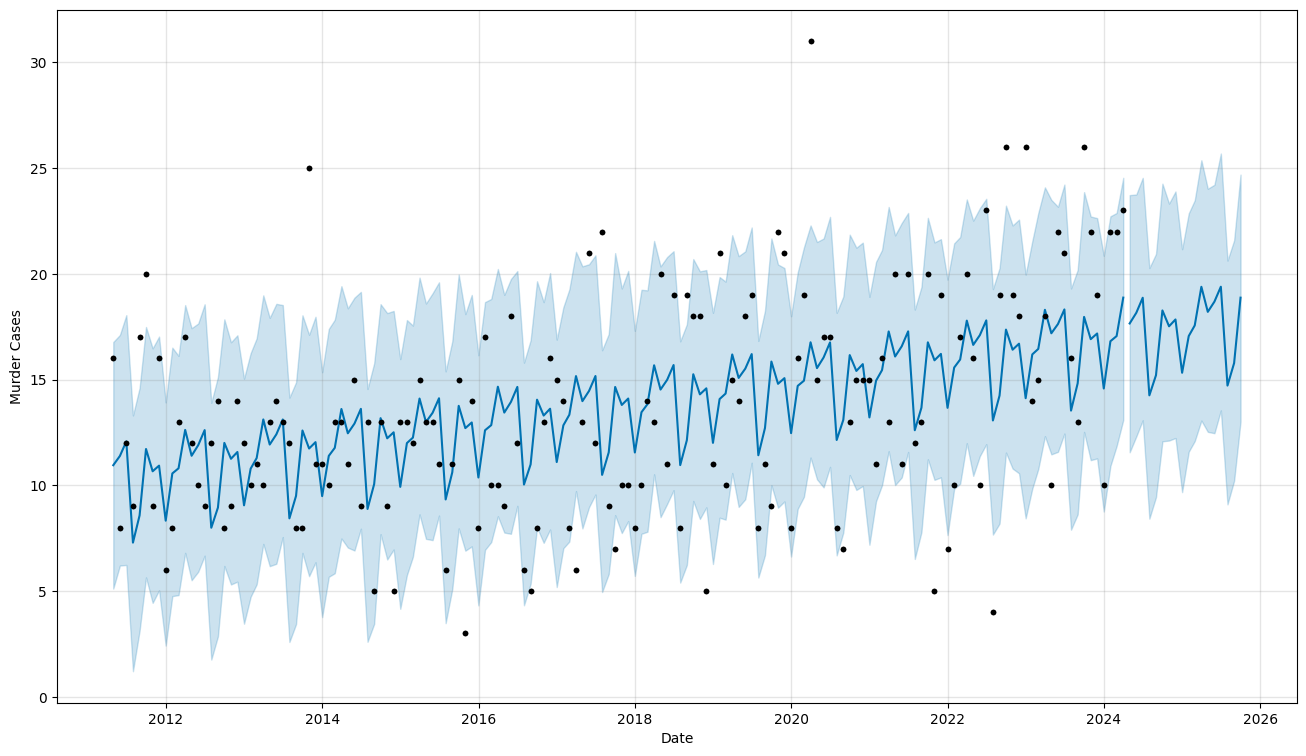

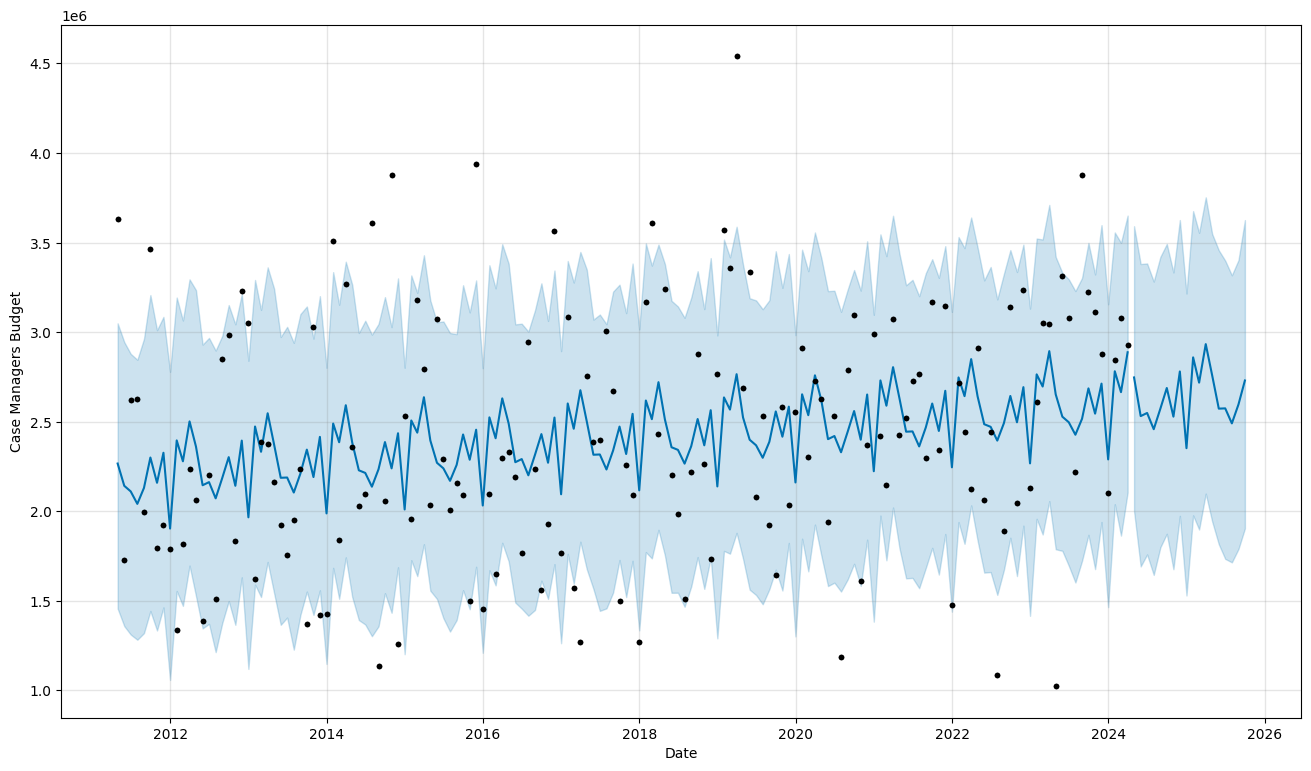

In [ ]:

#forecsst the 1st regressor
#########################################################################################
train_case_p = multi_total[["ds","case"]].rename(columns={"case":"y"})
#test_case_p = multi_train[["ds","case"]].rename(columns={"case":"y"})
model_case = Prophet(yearly_seasonality=True)
model_case.fit(train_case_p)
train_case_prdct = model_case.predict(train_case_p)
#test_case_prdct = model_case.predict(test_case_p)
case_future = model_case.make_future_dataframe(periods=18,freq='ME',include_history=False)
case_future_prdct = model_case.predict(case_future)

f, ax = plt.subplots(figsize=(16,9))
plot1 = model_case.plot(train_case_prdct, ax=ax);
plot1 = model_case.plot(case_future_prdct, ax=ax);
ax.set_xlabel('Date')
ax.set_ylabel('Murder Cases')


#########################################################################################
#forecsst the 2nd regressor
#########################################################################################
train_bud_p = multi_total[["ds","bud"]].rename(columns={"bud":"y"})
model_bud = Prophet(yearly_seasonality=True)
model_bud.fit(train_bud_p)
train_bud_prdct = model_bud.predict(train_bud_p)

#set the forecasting length
bud_future = model_bud.make_future_dataframe(periods=18,freq='ME',include_history=False)
bud_future_prdct = model_bud.predict(bud_future)

#ploting both trend and forecast in one graph
f, ax = plt.subplots(figsize=(16,9))
plot1 = model_bud.plot(train_bud_prdct , ax=ax);
plot1 = model_bud.plot(bud_future_prdct, ax = ax);
ax.set_xlabel('Date')
ax.set_ylabel('Case Managers Budget')




Text(0.5, 1.0, 'BCM Expenditures: Actual, Prediction and Forecast')

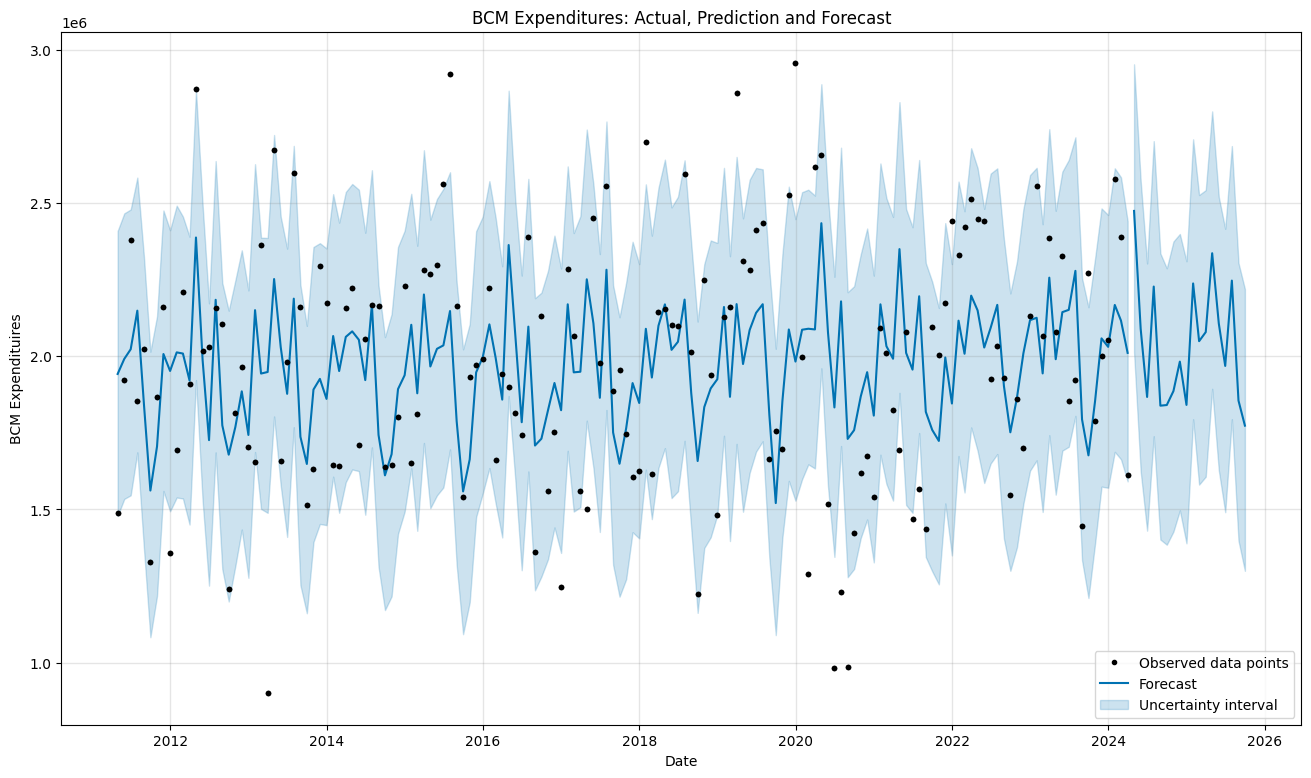

In [12]:
mulit_future = model_final.make_future_dataframe(periods = 18, freq='ME', include_history=True)

mulit_future['case'] = multi_train['case']
mulit_future['bud'] = multi_train['bud']

#Prep the regressors for forecasting the Actual Expense
case_future_prdc_2 = case_future_prdct[['ds','yhat']].rename(columns={"yhat":"yhat_case"})
bud_future_prdc_2 = bud_future_prdct[['ds','yhat']].rename(columns={"yhat":"yhat_bud"})

df_merge = pd.merge(case_future_prdc_2,bud_future_prdc_2,on='ds')

multi_future = pd.merge(df_merge,mulit_future,on='ds')

multi_future.fillna({'case':multi_future['yhat_case'],
                   'bud' :multi_future['yhat_bud']},inplace=True)
multi_future.drop(['yhat_case','yhat_bud'],inplace=True, axis=1)

mulit_future_prdct = model_final.predict(multi_future)

f, ax = plt.subplots(figsize=(16,9))
plot1 = model_final.plot(multi_train_prdct,ax=ax)
plt.legend()
plot2 = model_final.plot(mulit_future_prdct,ax=ax)

#plot3 = plt.plot(bcm_train_prophet['ds'],bcm_train['TOT_PAID'],color='r')
#plt.plot(multi_train_prdct['ds'],multi_train_prdct['yhat'],color='r')

ax.set_xlabel("Date")
ax.set_ylabel("BCM Expendituires")
ax.set_title("BCM Expenditures: Actual, Prediction and Forecast")



In [14]:
print(mulit_future_prdct[['ds','yhat']].tail(20))

           ds          yhat
0  2024-04-30  2.473970e+06
1  2024-05-31  2.088963e+06
2  2024-06-30  1.866962e+06
3  2024-07-31  2.227187e+06
4  2024-08-31  1.838517e+06
5  2024-09-30  1.840615e+06
6  2024-10-31  1.886046e+06
7  2024-11-30  1.982289e+06
8  2024-12-31  1.841025e+06
9  2025-01-31  2.237345e+06
10 2025-02-28  2.048977e+06
11 2025-03-31  2.078612e+06
12 2025-04-30  2.335933e+06
13 2025-05-31  2.106613e+06
14 2025-06-30  1.968203e+06
15 2025-07-31  2.246645e+06
16 2025-08-31  1.855028e+06
17 2025-09-30  1.773330e+06


In [32]:
# fig, ax = plt.subplots(figsize=(10, 5))
# fig = model.plot(bcm_test_fcst, ax=ax, xlabel='Date', ylabel='Total Paid')
# ax.plot(bcm_train.index, bcm_train['TOT_PAID'], color='b')

# ax.set_title('Prophet Forecast')


# #fig = model.plot_components(bcm_test_fcst)

# plt.show()




In [33]:

# #plot one fiscal year

# lower_bound = pd.to_datetime('2024-04-30')  # Ensure correct format
# upper_bound = pd.to_datetime('2025-04-30')

# fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(bcm_test.index, bcm_test['TOT_PAID'], color='r')
# fig = model.plot(bcm_test_fcst, ax=ax)
# # Set x-axis limits with datetime values
# ax.set_xbound(lower=lower_bound, upper=upper_bound)
# #ax.set_ylim(0, 60000)
# plot = plt.suptitle('Forecast vs Actuals - fiscal year 2024-25')
# plt.show()


In [34]:
# #plot the forecast with the actual ternd in trained dataset

# # Plot the forecast with the actuals

# lower_bound = pd.to_datetime('2015-04-30')  # Ensure correct format
# upper_bound = pd.to_datetime('2024-03-31')

# f, ax = plt.subplots(figsize=(15, 5))
# ax.plot(bcm_train.index, bcm_train['TOT_PAID'], color='r')
# fig = model.plot(bcm_train_fcst, ax=ax)
# ax.set_xbound(lower=lower_bound, upper=upper_bound)
# # Add legend
# ax.legend(['Actual TOT_PAID', 'Forecasted TOT_PAID'])
# ax.set_title('Forecast vs Actuals - Basemodel Simulation')
# #plt.show()



In [35]:
# # Create the time range for the forecast
# future_fcst = model.make_future_dataframe(periods=18,freq='ME',include_history=True)
# print(future_fcst.tail(20))

# # Make prediction
# forecast_baseline = model.predict(future_fcst)
# #print(forecast_baseline.tail(20))
# # Visualize the forecast
# model.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

# # Visualize the forecast components
# #model.plot_components(forecast_baseline)

# #plt.show()
# #check the model's accuracy

# mean_squared_error_b = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],
#                    y_pred=bcm_test_fcst['yhat']))
# print(mean_squared_error_b)

In [36]:
# # plot Prediction vs Actual in Test period
# plt.figure(figsize=(20, 10))
# plt.plot(multi_test_prdct['ds'],multi_test_prdct['yhat'])
# plt.plot(multi_test['ds'],multi_test['y'])
# plt.xticks(rotation='vertical')
# plt.grid(True)
# plt.show()

In [37]:
# # plot Prediction vs Actual in train period
# plt.figure(figsize=(20, 10))

# plt.plot(bcm_train_prophet['ds'],bcm_train['TOT_PAID'],color='b')
# plt.plot(multi_train_prdct['ds'],multi_train_prdct['yhat'],color='r')
# plt.xticks(rotation='vertical')
# plt.grid(True)
# plt.show()